In [109]:
# Importing the necessary packages

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [110]:
# Import the data

url = 'https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt'
df = pd.read_csv(url)

In [111]:
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [112]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [113]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


## EDA

In [114]:
df.shape

(645, 7)

In [115]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [116]:
# Missing value Analysis

df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

## Data Visualization

C:\Users\manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total floors in the house')

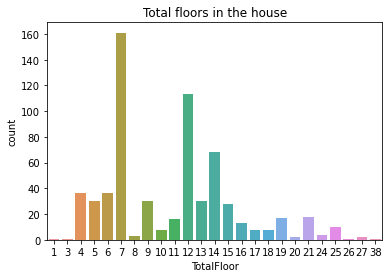

In [117]:
sns.countplot(df['TotalFloor'])
plt.title('Total floors in the house')

C:\Users\manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Numbers of bedroom in house')

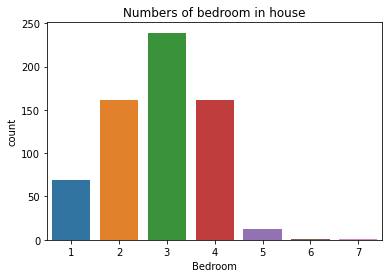

In [118]:
sns.countplot(df['Bedroom'])
plt.title('Numbers of bedroom in house')

C:\Users\manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Numbers of living room in house')

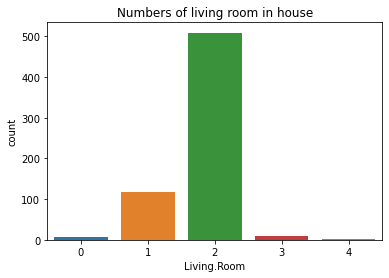

In [119]:
sns.countplot(df['Living.Room'])
plt.title('Numbers of living room in house')

C:\Users\manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Numbers of bathroom in house')

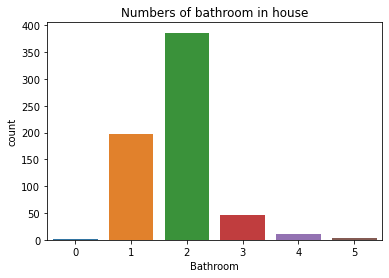

In [120]:
sns.countplot(df['Bathroom'])
plt.title('Numbers of bathroom in house')

C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Price of the house')

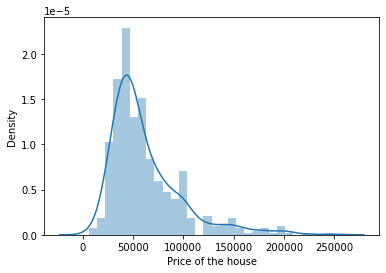

In [121]:
sns.distplot(df['Price'])
plt.xlabel('Price of the house')

<AxesSubplot:ylabel='Price'>

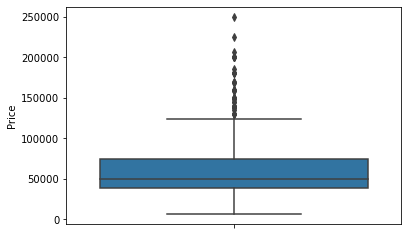

In [122]:
sns.boxplot(y = df['Price'])

## Feature Engineering

In [123]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [124]:
df['Totalrooms'] = df['Bedroom'] + df['Living.Room'] + df['Bathroom']

In [125]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,Totalrooms
0,1177.698,2,7,2,2,2,62000,6
1,2134.800,5,7,4,2,2,78000,8
2,1138.560,5,7,2,2,1,58000,5
3,1458.780,2,7,3,2,2,45000,7
4,967.776,11,14,3,2,2,45000,7


In [126]:
df.drop(['Bedroom', 'Living.Room', 'Bathroom'], axis = 1, inplace=True)

In [127]:
df.head()

,Sqft,Floor,TotalFloor,Price,Totalrooms
0,1177.698,2,7,62000,6
1,2134.800,5,7,78000,8
2,1138.560,5,7,58000,5
3,1458.780,2,7,45000,7
4,967.776,11,14,45000,7


In [128]:
data = df[['Sqft','Floor', 'TotalFloor', 'Totalrooms']]
target = df['Price']

In [135]:
from sklearn.preprocessing import RobustScaler
transformer1 = RobustScaler().fit(data)
data = transformer1.transform(data)
data = pd.DataFrame(data, columns= ['Sqft','Floor', 'TotalFloor', 'Totalrooms'])

In [136]:
data.head()

,Sqft,Floor,TotalFloor,Totalrooms
0,-0.253676,-0.6,-0.714286,-0.333333
1,0.735294,0.0,-0.714286,0.333333
2,-0.294118,0.0,-0.714286,-0.666667
3,0.036765,-0.6,-0.714286,0.000000
4,-0.470588,1.2,0.285714,0.000000


In [137]:
target.head()

0    62000
1    78000
2    58000
3    45000
4    45000
Name: Price, dtype: int64

## Model Building

In [138]:
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.25, random_state=5)

In [139]:
knn = KNeighborsClassifier(n_neighbors=5)

In [140]:
knn.fit(data_train, target_train)

KNeighborsClassifier()

In [141]:
house_pred = knn.predict(data_test)

print(house_pred)

[ 48800  26000  65000  55000  38000  65000  37000  24028  98000  57000
 100000  45000  55000  45000  45000  45000  78000  40000  39000  20000
  40000  75000 180000  45000  37000  39000  41000  45000  43000  25000
  45000  35000  98000 100000  43000  23000 160000  27000  38000  36000
  45000  36000 100000 110000  39000  48000 138888  60000  78000  21000
  45000 120000  40000   6100  28000  22000  60000  45000  23000 100000
  26000  27000  25000  41000  70000 100000  70000  33700  20000  27000
  80000  35000  95000  30000  28000  13000  50000  70000  60000  37000
  45000  49999  48000  44000  26000  65000  68000  45000  25000  36000
  38800  28000  37000  33700 120000  40000  26000 100000 120000  35000
  28000  57000  53000  80000 100000  78000  52000  36000  36000 100000
  37000  41000  70000  36000  35000  42000  78000  60000  25000  40000
  42000  27000  55000  40000  65000 100000 110000 100000  70000  33000
  21000  17000  99999  45000  77999  37000  42000  17000  39000  40000
  2000

In [142]:
# making confusion matrix

cm = confusion_matrix(target_test, house_pred)

In [143]:
print(cm)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [144]:
knn = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(knn, data, target, cv = 15, scoring='accuracy')

print(scores.mean())

0.18604651162790697


C:\Users\manis\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=15.
  warnings.warn(("The least populated class in y has only %d"


In [145]:
k_range = range(1, 50)

k_scores = []

for k in k_range:
    knn2 = KNeighborsClassifier(n_neighbors=k)

    scores2 = cross_val_score(knn2, data, target, cv = 15, scoring='accuracy')

    k_scores.append(scores2.mean())

C:\Users\manis\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=15.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\manis\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=15.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\manis\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=15.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\manis\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=15.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\manis\anaconda3\lib\site-packag

Text(0, 0.5, 'cross-validated accuracy')

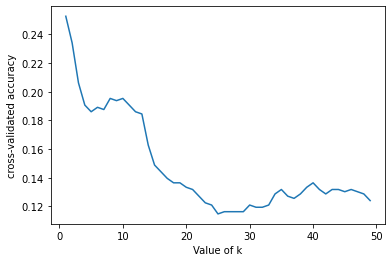

In [146]:
plt.plot(k_range, k_scores)
plt.xlabel("Value of k")
plt.ylabel("cross-validated accuracy")